Plot degree distribution of the Pokec network at the level of the coarse grained blocks we have defined.

Created on: 06/03/21

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import random
import itertools
import matplotlib
from scipy import stats
import math

from ising_block_level_influence import N_Block_sbm_class as NBlock
from ising_block_level_influence import projection_simplex as proj
from ising_block_level_influence import mean_field_IIM
from spatial_spin_monte_carlo import spatial_spin_monte_carlo as Spins
import Pokec_processing as  PokProc

from pokec_utils import *

In [2]:
graph = nx.read_graphml('Data/Bratislava_graph.graphml')
beta_c = Spins.crit_beta_sparse(graph)
bratislava_profiles = pd.read_csv("Data/bratislava_profiles.csv")
coupling_graph = nx.read_graphml('Data/Bratislava_coupling.graphml')
block_data = pd.read_csv('Data/block_info.csv',converters={'Block' : ast.literal_eval})
mean_block_ages = list(block_data['average_age'])
block_sizes = list(block_data['block_size'])
block_names = list(block_data['block_name'])
block_data['age_group'] = [ 'ages_' + k.split('_')[-1] for k in list(block_data['block_name'])]
block_data.head()

Computing critical temperature


,Unnamed: 0,block_name,block_size,average_age,age_group
0,0,Okolie_ages_1-17,1234,9.0,ages_1-17
1,1,Okolie_ages_18-21,1939,19.5,ages_18-21
2,2,Okolie_ages_22-28,3154,25.0,ages_22-28
3,3,Okolie_ages_29-112,3458,70.5,ages_29-112
4,4,Petrzalka_ages_1-17,1398,9.0,ages_1-17


In [3]:
bratislava_profiles_indices = bratislava_profiles.reset_index()
groups = [ bratislava_profiles_indices.loc[bratislava_profiles_indices['block']==block] for block in block_names]
groups_node_ids = [list(k['index']) for k in groups]

In [4]:
bratislava_profiles_indices

,index,Unnamed: 0,Unnamed: 0.1,user_id,gender,region,age,user_lat,user_lon,age_group,block
0,0,112,112,181,1.0,Ruzinov,26.0,48.149314,17.164505,ages_22-28,Ruzinov_ages_22-28
1,1,314,314,344,0.0,Ruzinov,22.0,48.149314,17.164505,ages_22-28,Ruzinov_ages_22-28
2,2,804,804,834,1.0,Okolie,18.0,48.295066,17.242634,ages_18-21,Okolie_ages_18-21
3,3,1247,1247,1138,0.0,Okolie,16.0,48.295066,17.242634,ages_1-17,Okolie_ages_1-17
4,4,2010,2010,2032,0.0,Petrzalka,20.0,48.110972,17.111290,ages_18-21,Petrzalka_ages_18-21
...,...,...,...,...,...,...,...,...,...,...,...
29577,29577,1632373,1632373,1632374,0.0,Petrzalka,34.0,48.110972,17.111290,ages_29-112,Petrzalka_ages_29-112
29578,29578,1632399,1632399,1632400,0.0,Okolie,56.0,48.295066,17.242634,ages_29-112,Okolie_ages_29-112
29579,29579,1632423,1632423,1632424,1.0,Okolie,45.0,48.295066,17.242634,ages_29-112,Okolie_ages_29-112
29580,29580,1632753,1632753,1632754,1.0,Ruzinov,48.0,48.149314,17.164505,ages_29-112,Ruzinov_ages_29-112


In [6]:
degrees=list(dict(graph.degree()).values())

In [7]:
bratislava_profiles_indices['degree']=degrees

In [8]:
df=bratislava_profiles_indices

4.0
4.0
3.0
2.0
3.0
4.0
3.0
2.0
3.0
4.0
3.0
2.0


(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 <a list of 10 Text yticklabel objects>)

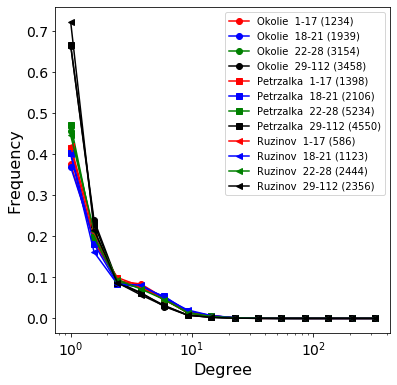

In [23]:
# to do: show block sizes in legend?


region_symbol={'Okolie':'o','Petrzalka':'s','Ruzinov':'<'}
age_colour={'1-17':'r','18-21':'b','22-28':'g','29-112':'k'}

fig,ax=plt.subplots(figsize=(6,6))
for block_name in block_names :
    current_degrees = df.loc[df['block']==block_name]['degree'].to_list()
    print(np.median(current_degrees))
    
    region=block_name.split('_')[0]
    age_group=block_name.split('_')[2]
    
    
    lab=block_name.replace('_',' ').replace('ages','') + f" ({len(current_degrees)})"
    
    counts,bins=np.histogram(current_degrees,bins=[10**k for k in np.linspace(0,2.7,15)],density=True)
    plt.plot(bins[:-1],counts,f'{age_colour[age_group]}{region_symbol[region]}-',label=lab)

#plt.hist(degrees)
plt.legend()
#plt.yscale('log')
plt.xscale('log')
plt.xlabel("Degree",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.savefig("Plots/block_level_degree_dist")

In [ ]:
sns.lineplot(data=df,x='gradient',y='mag',hue='Mean Age',palette='coolwarm',style='Region',lw=2.0)